1.데이터 로드

In [4]:
from tensorflow.keras.datasets import reuters
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import sklearn



In [5]:
# 빈도수 상위 5,000개의 단어만 사용
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=5000, test_split=0.2)

In [6]:
print('훈련 샘플의 수: {}'.format(len(x_train)))
print('테스트 샘플의 수: {}'.format(len(x_test)))

훈련 샘플의 수: 8982
테스트 샘플의 수: 2246


데이터 출력해보기

In [7]:
print(x_train[0])
print(x_test[0])

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
[1, 4, 1378, 2025, 9, 697, 4622, 111, 8, 25, 109, 29, 3650, 11, 150, 244, 364, 33, 30, 30, 1398, 333, 6, 2, 159, 9, 1084, 363, 13, 2, 71, 9, 2, 71, 117, 4, 225, 78, 206, 10, 9, 1214, 8, 4, 270, 5, 2, 7, 748, 48, 9, 2, 7, 207, 1451, 966, 1864, 793, 97, 133, 336, 7, 4, 493, 98, 273, 104, 284, 25, 39, 338, 22, 905, 220, 3465, 644, 59, 20, 6, 119, 61, 11, 15, 58, 579, 26, 10, 67, 7, 4, 738, 98, 43, 88, 333, 722, 12, 20, 6, 19, 746, 35, 15, 10, 9, 1214, 855, 129, 783, 21, 4, 2280, 244, 364, 51, 16, 299, 452, 16, 515, 4, 99, 29, 5, 4, 364, 281, 48, 10, 9, 1214, 23, 644, 47, 20, 324, 27, 56, 2, 2, 5, 192, 510, 17, 12]


In [8]:
print(y_train[0])
print(y_test[0])

3
3


In [9]:
num_classes = max(y_train) + 1
print('클래스의 수 : {}'.format(num_classes))

클래스의 수 : 46


데이터 분포 확인

훈련용 뉴스의 최대 길이 :2376
훈련용 뉴스의 평균 길이 :145.5398574927633


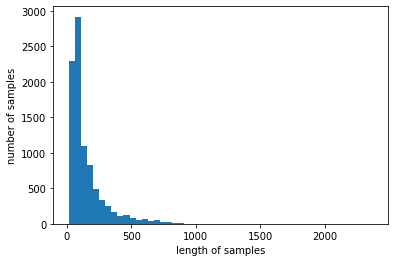

In [10]:
print('훈련용 뉴스의 최대 길이 :{}'.format(max(len(l) for l in x_train)))
print('훈련용 뉴스의 평균 길이 :{}'.format(sum(map(len, x_train))/len(x_train)))

plt.hist([len(s) for s in x_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

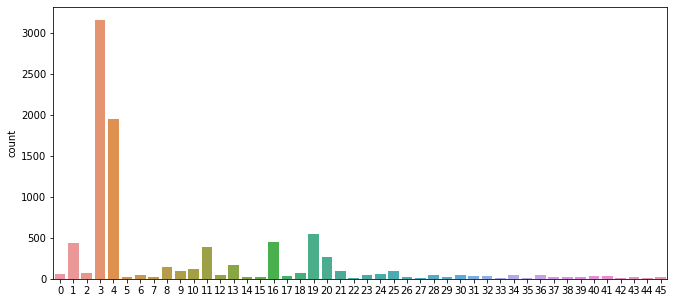

In [11]:
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(11,5)
sns.countplot(x=y_train)
plt.show()

In [12]:
unique_elements, counts_elements = np.unique(y_train, return_counts=True)
print("각 클래스 빈도수:")
print(np.asarray((unique_elements, counts_elements)))

각 클래스 빈도수:
[[   0    1    2    3    4    5    6    7    8    9   10   11   12   13
    14   15   16   17   18   19   20   21   22   23   24   25   26   27
    28   29   30   31   32   33   34   35   36   37   38   39   40   41
    42   43   44   45]
 [  55  432   74 3159 1949   17   48   16  139  101  124  390   49  172
    26   20  444   39   66  549  269  100   15   41   62   92   24   15
    48   19   45   39   32   11   50   10   49   19   19   24   36   30
    13   21   12   18]]


데이터 복원하기

In [13]:
word_index = reuters.get_word_index(path="reuters_word_index.json")

565248/550378 [==============================] - 0s 0us/step


In [14]:
index_to_word = { index+3 : word for word, index in word_index.items() }

In [15]:
# index_to_word에 숫자 0은 <pad>, 숫자 1은 <sos>, 숫자 2는 <unk>를 넣어줍니다.
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
  index_to_word[index]=token

In [16]:
print(' '.join([index_to_word[index] for index in x_train[0]]))

<sos> <unk> <unk> said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [17]:
print(' '.join([index_to_word[index] for index in [4, 587, 23, 133, 6, 30, 515]]))

the transaction is expected to be completed


 텍스트 데이터로 변환

In [18]:
decoded = []
for i in range(len(x_train)):
    t = ' '.join([index_to_word[index] for index in x_train[i]])
    decoded.append(t)

x_train = decoded
print(len(x_train))

8982


In [19]:
decoded = []
for i in range(len(x_test)):
    t = ' '.join([index_to_word[index] for index in x_test[i]])
    decoded.append(t)

x_test = decoded
print(len(x_test))

2246


In [20]:
x_train[:5]

['<sos> <unk> <unk> said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3',
 '<sos> generale de banque sa lt <unk> <unk> and lt heller overseas corp of chicago have each taken 50 pct stakes in <unk> company sa <unk> factors generale de banque said in a statement it gave no financial details of the transaction sa <unk> <unk> turnover in 1986 was 17 5 billion belgian francs reuter 3',
 '<sos> shr 3 28 dlrs vs 22 cts shr diluted 2 99 dlrs vs 22 cts net 46 0 mln vs 3 328 000 avg shrs 14 0 mln vs 15 2 mln year shr 5 41 dlrs vs 1 56 dlrs shr diluted 4 94 dlrs vs 1 50 dlrs net 78 2 mln vs 25 9 mln avg shrs 14 5 mln vs 15 1 mln note earnings per share reflect the two fo

In [21]:
x_test[:5]

['<sos> the great atlantic and pacific tea co said its three year 345 mln dlr capital program will be be substantially increased to <unk> growth and expansion plans for <unk> inc and <unk> inc over the next two years a and p said the acquisition of <unk> in august 1986 and <unk> in december helped us achieve better than expected results in the fourth quarter ended february 28 its net income from continuing operations jumped 52 6 pct to 20 7 mln dlrs or 55 cts a share in the latest quarter as sales increased 48 3 pct to 1 58 billion dlrs a and p gave no details on the expanded capital program but it did say it completed the first year of the program during 1986 a and p is 52 4 pct owned by lt <unk> <unk> of west germany reuter 3',
 "<sos> philippine sugar production in the 1987 88 crop year ending august has been set at 1 6 mln tonnes up from a provisional 1 3 mln tonnes this year sugar regulatory administration <unk> chairman <unk> <unk> said <unk> told reuters a survey during the curr

벡터화 하기

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [23]:
dtmvector = CountVectorizer() 
x_train_dtm = dtmvector.fit_transform(x_train)
print(x_train_dtm.shape)

(8982, 4867)


In [24]:
tfidf_transformer = TfidfTransformer()
tfidfv = tfidf_transformer.fit_transform(x_train_dtm)
print(tfidfv.shape)

(8982, 4867)


    사용할 모델

    나이브 베이즈 분류기, CNB, 로지스틱 회귀, 서포트 벡터 머신, 결정 트리, 랜덤 포레스트, 그래디언트 부스팅 트리, 보팅 

In [25]:
from sklearn.naive_bayes import MultinomialNB #다항분포 나이브 베이즈 모델
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score #정확도 계산

In [26]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print('=3')

=3


 나이브 베이즈 분류기

In [27]:
model = MultinomialNB()
model.fit(tfidfv, y_train)

MultinomialNB()

In [28]:
x_test_dtm = dtmvector.transform(x_test) #테스트 데이터를 DTM으로 변환
tfidfv_test = tfidf_transformer.transform(x_test_dtm) #DTM을 TF-IDF 행렬로 변환

predicted = model.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.6731967943009796


In [29]:
print(classification_report(y_test, model.predict(tfidfv_test), zero_division=0))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.50      0.80      0.62       105
           2       0.00      0.00      0.00        20
           3       0.86      0.89      0.87       813
           4       0.59      0.95      0.73       474
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00        14
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00        38
           9       1.00      0.28      0.44        25
          10       0.00      0.00      0.00        30
          11       0.48      0.73      0.58        83
          12       0.00      0.00      0.00        13
          13       1.00      0.14      0.24        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16       0.60      0.66      0.62        99
          17       0.00    

컴플리먼트 나이브 베이즈 분류기(CNB)

In [30]:
cb = ComplementNB()
cb.fit(tfidfv, y_train)

ComplementNB()

In [31]:
predicted = cb.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.7707034728406055


In [32]:
print(classification_report(y_test, cb.predict(tfidfv_test), zero_division=0))

              precision    recall  f1-score   support

           0       0.88      0.58      0.70        12
           1       0.63      0.86      0.73       105
           2       0.91      0.50      0.65        20
           3       0.91      0.89      0.90       813
           4       0.74      0.92      0.82       474
           5       0.00      0.00      0.00         5
           6       0.86      0.86      0.86        14
           7       1.00      0.67      0.80         3
           8       0.57      0.21      0.31        38
           9       0.82      0.92      0.87        25
          10       0.96      0.80      0.87        30
          11       0.54      0.76      0.63        83
          12       0.00      0.00      0.00        13
          13       0.69      0.59      0.64        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16       0.67      0.79      0.72        99
          17       0.00    

로지스틱 회귀

In [33]:
lr = LogisticRegression(C=10000, penalty='l2')
lr.fit(tfidfv, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(C=10000)

In [34]:
predicted = lr.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.8058771148708815


In [35]:
print(classification_report(y_test, lr.predict(tfidfv_test), zero_division=0))

              precision    recall  f1-score   support

           0       0.89      0.67      0.76        12
           1       0.77      0.80      0.79       105
           2       0.74      0.85      0.79        20
           3       0.91      0.93      0.92       813
           4       0.81      0.87      0.84       474
           5       0.00      0.00      0.00         5
           6       0.92      0.86      0.89        14
           7       1.00      0.67      0.80         3
           8       0.64      0.74      0.68        38
           9       0.81      0.88      0.85        25
          10       0.93      0.87      0.90        30
          11       0.64      0.73      0.68        83
          12       0.57      0.31      0.40        13
          13       0.64      0.62      0.63        37
          14       0.50      0.50      0.50         2
          15       0.83      0.56      0.67         9
          16       0.67      0.73      0.70        99
          17       0.82    

서포트 벡터 머신

In [36]:
lsvc = LinearSVC(C=1000, penalty='l1', max_iter=500, dual=False)
lsvc.fit(tfidfv, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LinearSVC(C=1000, dual=False, max_iter=500, penalty='l1')

In [37]:
predicted = lsvc.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.7702582368655387


In [38]:
print(classification_report(y_test, lsvc.predict(tfidfv_test), zero_division=0))

              precision    recall  f1-score   support

           0       0.89      0.67      0.76        12
           1       0.70      0.72      0.71       105
           2       0.79      0.75      0.77        20
           3       0.90      0.90      0.90       813
           4       0.79      0.85      0.82       474
           5       0.00      0.00      0.00         5
           6       0.76      0.93      0.84        14
           7       1.00      0.33      0.50         3
           8       0.68      0.66      0.67        38
           9       0.80      0.80      0.80        25
          10       0.76      0.73      0.75        30
          11       0.61      0.71      0.66        83
          12       0.36      0.31      0.33        13
          13       0.51      0.57      0.54        37
          14       1.00      0.50      0.67         2
          15       0.50      0.22      0.31         9
          16       0.65      0.69      0.67        99
          17       0.60    

결정 트리(Decision Tree)

In [39]:
tree = DecisionTreeClassifier(max_depth=10, random_state=0)
tree.fit(tfidfv, y_train)

DecisionTreeClassifier(max_depth=10, random_state=0)

In [40]:
predicted = tree.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.6179875333926982


In [41]:
print(classification_report(y_test, tree.predict(tfidfv_test), zero_division=0))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.72      0.40      0.52       105
           2       0.60      0.45      0.51        20
           3       0.94      0.84      0.89       813
           4       0.39      0.91      0.55       474
           5       0.00      0.00      0.00         5
           6       1.00      0.57      0.73        14
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00        38
           9       0.88      0.88      0.88        25
          10       0.87      0.87      0.87        30
          11       0.62      0.48      0.54        83
          12       0.17      0.08      0.11        13
          13       0.00      0.00      0.00        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16       0.60      0.82      0.69        99
          17       0.00    

랜덤 포레스트(Random Forest)

In [42]:
forest = RandomForestClassifier(n_estimators=5, random_state=0)
forest.fit(tfidfv, y_train)

RandomForestClassifier(n_estimators=5, random_state=0)

In [43]:
predicted = forest.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.701246660730187


In [44]:
print(classification_report(y_test, forest.predict(tfidfv_test), zero_division=0))


              precision    recall  f1-score   support

           0       0.28      0.42      0.33        12
           1       0.42      0.78      0.55       105
           2       0.44      0.35      0.39        20
           3       0.84      0.90      0.87       813
           4       0.68      0.84      0.75       474
           5       0.00      0.00      0.00         5
           6       0.86      0.43      0.57        14
           7       1.00      0.33      0.50         3
           8       0.59      0.53      0.56        38
           9       0.71      0.40      0.51        25
          10       0.89      0.53      0.67        30
          11       0.57      0.69      0.62        83
          12       0.33      0.15      0.21        13
          13       0.46      0.32      0.38        37
          14       0.00      0.00      0.00         2
          15       1.00      0.11      0.20         9
          16       0.70      0.67      0.68        99
          17       0.00    

그래디언트 부스팅 트리(GradientBoostingClassifier)

In [45]:
grbt = GradientBoostingClassifier(random_state=0) # verbose=3
grbt.fit(tfidfv, y_train)

GradientBoostingClassifier(random_state=0)

In [46]:
predicted = grbt.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.767586821015138


In [47]:
print(classification_report(y_test, grbt.predict(tfidfv_test), zero_division=0))

              precision    recall  f1-score   support

           0       0.89      0.67      0.76        12
           1       0.80      0.68      0.73       105
           2       0.70      0.70      0.70        20
           3       0.90      0.90      0.90       813
           4       0.76      0.83      0.79       474
           5       0.14      0.20      0.17         5
           6       0.93      0.93      0.93        14
           7       0.50      0.33      0.40         3
           8       0.64      0.66      0.65        38
           9       0.91      0.84      0.87        25
          10       0.87      0.87      0.87        30
          11       0.62      0.66      0.64        83
          12       0.46      0.46      0.46        13
          13       0.55      0.43      0.48        37
          14       0.08      0.50      0.14         2
          15       0.33      0.22      0.27         9
          16       0.72      0.77      0.75        99
          17       0.33    

보팅 

In [48]:
voting_classifier = VotingClassifier(estimators=[
         ('lr', LogisticRegression(C=10000, penalty='l2')),
        ('cb', ComplementNB()),
        ('grbt', GradientBoostingClassifier(random_state=0))
], voting='soft', n_jobs=-1)
voting_classifier.fit(tfidfv, y_train)


VotingClassifier(estimators=[('lr', LogisticRegression(C=10000)),
                             ('cb', ComplementNB()),
                             ('grbt',
                              GradientBoostingClassifier(random_state=0))],
                 n_jobs=-1, voting='soft')

In [49]:
predicted = voting_classifier.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교


정확도: 0.8161175422974176


In [50]:
print(classification_report(y_test, voting_classifier.predict(tfidfv_test), zero_division=0))

              precision    recall  f1-score   support

           0       0.90      0.75      0.82        12
           1       0.80      0.77      0.79       105
           2       0.71      0.85      0.77        20
           3       0.92      0.94      0.93       813
           4       0.82      0.88      0.85       474
           5       0.33      0.20      0.25         5
           6       0.93      0.93      0.93        14
           7       0.67      0.67      0.67         3
           8       0.72      0.68      0.70        38
           9       0.81      0.84      0.82        25
          10       0.93      0.90      0.92        30
          11       0.67      0.70      0.68        83
          12       0.60      0.46      0.52        13
          13       0.68      0.62      0.65        37
          14       0.12      0.50      0.20         2
          15       0.67      0.44      0.53         9
          16       0.74      0.74      0.74        99
          17       0.57    

딥러닝 모델과 비교해 보기

In [69]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=5000, test_split=0.2)

In [85]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
max_len=145
X_train = pad_sequences(x_train, maxlen=max_len)
X_test = pad_sequences(x_test, maxlen=max_len)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [86]:
import tensorflow as tf
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

vocab_size = 5000 #사용할 단어사전 크기
embedding_dim = 128 #임베딩레이어 차원 수 


model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, embedding_dim))
model.add(tf.keras.layers.LSTM(128)) #hidden 노드 128개
model.add(tf.keras.layers.Dense(46, activation='softmax')) 



model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, None, 128)         640000    
                                                                 
 lstm_4 (LSTM)               (None, 128)               131584    
                                                                 
 dense_8 (Dense)             (None, 46)                5934      
                                                                 
Total params: 777,518
Trainable params: 777,518
Non-trainable params: 0
_________________________________________________________________


In [88]:
# 모델 학습
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
              
epochs=100  
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)  
mc = ModelCheckpoint('best', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

history = model.fit(X_train, 
                    y_train,
                    epochs=epochs,
                    batch_size=512,
                    callbacks=(es,mc),
                    validation_split=0.2)

Epoch 1/100
15/15 [==============================] - ETA: 0s - loss: 0.8549 - accuracy: 0.7761
Epoch 1: val_loss improved from inf to 1.54194, saving model to best


INFO:tensorflow:Assets written to: best/assets


INFO:tensorflow:Assets written to: best/assets


15/15 [==============================] - 29s 2s/step - loss: 0.8549 - accuracy: 0.7761 - val_loss: 1.5419 - val_accuracy: 0.6427
Epoch 2/100
15/15 [==============================] - ETA: 0s - loss: 0.7433 - accuracy: 0.8032
Epoch 2: val_loss did not improve from 1.54194
15/15 [==============================] - 22s 1s/step - loss: 0.7433 - accuracy: 0.8032 - val_loss: 1.5691 - val_accuracy: 0.6344
Epoch 3/100
15/15 [==============================] - ETA: 0s - loss: 0.7428 - accuracy: 0.8056
Epoch 3: val_loss did not improve from 1.54194
15/15 [==============================] - 22s 1s/step - loss: 0.7428 - accuracy: 0.8056 - val_loss: 1.5480 - val_accuracy: 0.6433
Epoch 4/100
15/15 [==============================] - ETA: 0s - loss: 0.6862 - accuracy: 0.8267
Epoch 4: val_loss improved from 1.54194 to 1.52890, saving model to best


INFO:tensorflow:Assets written to: best/assets


INFO:tensorflow:Assets written to: best/assets


15/15 [==============================] - 26s 2s/step - loss: 0.6862 - accuracy: 0.8267 - val_loss: 1.5289 - val_accuracy: 0.6578
Epoch 5/100
15/15 [==============================] - ETA: 0s - loss: 0.6386 - accuracy: 0.8386
Epoch 5: val_loss improved from 1.52890 to 1.52801, saving model to best


INFO:tensorflow:Assets written to: best/assets


INFO:tensorflow:Assets written to: best/assets


15/15 [==============================] - 26s 2s/step - loss: 0.6386 - accuracy: 0.8386 - val_loss: 1.5280 - val_accuracy: 0.6539
Epoch 6/100
15/15 [==============================] - ETA: 0s - loss: 0.6185 - accuracy: 0.8420
Epoch 6: val_loss did not improve from 1.52801
15/15 [==============================] - 22s 1s/step - loss: 0.6185 - accuracy: 0.8420 - val_loss: 1.5577 - val_accuracy: 0.6522
Epoch 7/100
15/15 [==============================] - ETA: 0s - loss: 0.5945 - accuracy: 0.8469
Epoch 7: val_loss did not improve from 1.52801
15/15 [==============================] - 22s 1s/step - loss: 0.5945 - accuracy: 0.8469 - val_loss: 1.6082 - val_accuracy: 0.6539
Epoch 8/100
15/15 [==============================] - ETA: 0s - loss: 0.5570 - accuracy: 0.8558
Epoch 8: val_loss did not improve from 1.52801
15/15 [==============================] - 22s 1s/step - loss: 0.5570 - accuracy: 0.8558 - val_loss: 1.5900 - val_accuracy: 0.6433
Epoch 9/100
15/15 [==============================] - ETA: 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


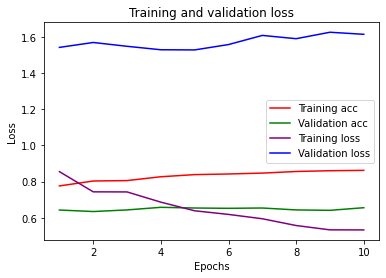

In [89]:
history_dict = history.history
print(history_dict.keys()) # epoch에 따른 그래프를 그려볼 수 있는 항목들
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo"는 "파란색 점"입니다
plt.plot(epochs, acc, 'red', label='Training acc')
plt.plot(epochs, val_acc, 'green', label='Validation acc')
plt.plot(epochs, loss, 'purple', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')
# b는 "파란 실선"입니다

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

** 회고록


머신 러닝에서 보팅이 가장 정확도가 높아서 보팅이 성능이 좋은 것으로 보인다. 딥러닝은 이전 익스에서 했던 것을 참고로 해서 작성을 하였다. LSTM이 보팅보다 성능이 조금 더 좋은 것으로 확인이 되었다. 고잉디퍼로 넘어가면서 이론이 많이 어려운데 그래도 노드를 참고해서 하다보니 코드 작성에 크게 어려움은 없었다. 